그 과정에서 다음과 같은 몇 가지 실제 문제에 대한 솔루션을 제공하게 됩니다.

글로벌 비영리 단체가 필리핀의 외딴 지역에서 활동 범위를 확장해야 하는 곳은 어디입니까?
멸종 위기에 처한 새 종인 보라색 마틴은 북미와 남미 사이를 어떻게 여행합니까? 새들이 보호 구역으로 이동하고 있습니까?
추가 지진 보강으로 잠재적으로 이익을 얻을 수 있는 일본의 지역은 어디입니까?
캘리포니아의 어느 스타벅스 매장이 다음 스타벅스 리저브 로스터리 위치로 유력한 후보입니까?
뉴욕시에는 자동차 충돌에 대처할 수 있는 충분한 병원이 있습니까? 도시의 어느 지역에 적용 범위에 차이가 있습니까?
또한 보스턴 시의 범죄를 시각화하고, 가나의 의료 시설을 조사하고, 유럽 최고의 대학을 탐색하고, 미국의 독성 화학 물질 방출을 추적합니다.

이 첫 번째 자습서에서는 이 마이크로 과정을 완료하는 데 필요한 사전 요구 사항을 빠르게 다룰 것입니다. 그리고 더 깊이 복습하고 싶다면 Pandas 마이크로 코스를 추천합니다.

또한 첫 번째 지리 공간 데이터 세트를 시각화하는 작업을 시작할 것입니다!

In [1]:
import geopandas as gpd

shapefile, GeoJSON, KML 및 GPKG와 같은 매우 다양한 지리 공간 파일 형식이 있습니다. 이 세부 과정에서는 이들의 차이점에 대해 논의하지 않겠지만 다음 사항을 언급하는 것이 중요합니다.

shapefile은 접하게 될 가장 일반적인 파일 형식이며
이러한 모든 파일 형식은 gpd.read_file() 함수로 빠르게 로드할 수 있습니다.
다음 코드 셀은 뉴욕주 환경보존부에서 관리하는 숲, 황무지 및 기타 토지에 대한 정보가 포함된 shapefile을 로드합니다.

In [29]:
# Read in the data
loans_file = gpd.read_file("C:/Users/joppu/OneDrive/문서/data minning/archive/kiva_loans/kiva_loans/kiva_loans.shp")

# View the first five rows of the data
loans_file.head()


,Partner ID,Field Part,sector,Loan Theme,country,amount,geometry
0,9,KREDIT Microfinance Institution,General Financial Inclusion,Higher Education,Cambodia,450,POINT (102.89751 13.66726)
1,9,KREDIT Microfinance Institution,General Financial Inclusion,Vulnerable Populations,Cambodia,20275,POINT (102.98962 13.02870)
2,9,KREDIT Microfinance Institution,General Financial Inclusion,Higher Education,Cambodia,9150,POINT (102.98962 13.02870)
3,9,KREDIT Microfinance Institution,General Financial Inclusion,Vulnerable Populations,Cambodia,604950,POINT (105.31312 12.09829)
4,9,KREDIT Microfinance Institution,General Financial Inclusion,Sanitation,Cambodia,275,POINT (105.31312 12.09829)


"CLASS" 열에서 볼 수 있듯이 처음 5개 행은 각각 다른 포리스트에 해당합니다.

이 자습서의 나머지 부분에서는 이 데이터를 사용하여 주말 캠핑 여행을 계획하려는 시나리오를 고려하십시오. 온라인에서 크라우드 소싱 리뷰에 의존하는 대신 자신만의 지도를 만들기로 결정합니다. 이렇게 하면 특정 관심사에 맞게 여행을 조정할 수 있습니다.

전제 조건
데이터의 처음 5개 행을 보기 위해 head() 메서드를 사용했습니다. 이것이 Pandas DataFrame을 미리보기 위해 사용하는 것임을 기억할 것입니다. 실제로 DataFrame과 함께 사용할 수 있는 모든 명령은 데이터와 함께 작동합니다!

데이터가 (Pandas) DataFrame의 모든 기능이 있는 (GeoPandas) GeoDataFrame 개체에 로드되었기 때문입니다.

In [3]:
type(loans_file)

geopandas.geodataframe.GeoDataFrame

예를 들어 모든 열을 사용할 계획이 아닌 경우 일부 열을 선택할 수 있습니다. (데이터 선택을 위한 다른 방법을 검토하려면 Pandas 마이크로 코스에서 이 튜토리얼을 확인하십시오.)

In [4]:
data = loans_file.loc[:, ["CLASS", "COUNTY", "geometry"]].copy()

우리는 value_counts() 메서드를 사용하여 데이터 세트에 나타나는 횟수와 함께 다양한 토지 유형 목록을 확인합니다. (이것(및 관련 방법)을 검토하려면 Pandas 마이크로 코스에서 이 자습서를 확인하십시오.)

In [5]:
# How many lands of each type are there?
data.CLASS.value_counts()

WILD FOREST                   965
INTENSIVE USE                 108
PRIMITIVE                      60
WILDERNESS                     52
ADMINISTRATIVE                 17
UNCLASSIFIED                    7
HISTORIC                        5
PRIMITIVE BICYCLE CORRIDOR      4
CANOE AREA                      1
Name: CLASS, dtype: int64

loc(및 iloc) 및 isin을 사용하여 데이터의 하위 집합을 선택할 수도 있습니다. (이것을 검토하려면 Pandas 마이크로 코스에서 이 튜토리얼을 확인하십시오.)

In [6]:
# Select lands that fall under the "WILD FOREST" or "WILDERNESS" category
wild_lands = data.loc[data.CLASS.isin(['WILD FOREST', 'WILDERNESS'])].copy()
wild_lands.head()

,CLASS,COUNTY,geometry
0,WILD FOREST,DELAWARE,"POLYGON ((486093.245 4635308.586, 486787.235 4..."
1,WILD FOREST,DELAWARE,"POLYGON ((491931.514 4637416.256, 491305.424 4..."
2,WILD FOREST,DELAWARE,"POLYGON ((486000.287 4635834.453, 485007.550 4..."
3,WILD FOREST,GREENE,"POLYGON ((541716.775 4675243.268, 541217.579 4..."
4,WILD FOREST,ESSEX,"POLYGON ((583896.043 4909643.187, 583891.200 4..."


위의 명령에 익숙하지 않은 경우 필요에 따라 명령을 찾아볼 수 있도록 참조용으로 이 페이지를 북마크하는 것이 좋습니다. (또는 Pandas 마이크로 과정을 수강할 수 있습니다.) 지도를 만들기 전에 이 마이크로 과정 전체에서 이러한 명령을 사용하여 데이터를 이해하고 필터링합니다.

## Create your first map!

<Axes: >

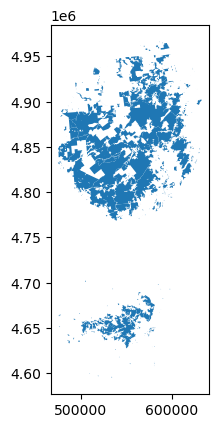

In [7]:
wild_lands.plot()

In [8]:
# View the first five entries in the "geometry" column
wild_lands.geometry.head()

0    POLYGON ((486093.245 4635308.586, 486787.235 4...
1    POLYGON ((491931.514 4637416.256, 491305.424 4...
2    POLYGON ((486000.287 4635834.453, 485007.550 4...
3    POLYGON ((541716.775 4675243.268, 541217.579 4...
4    POLYGON ((583896.043 4909643.187, 583891.200 4...
Name: geometry, dtype: geometry

In [26]:


# 데이터 불러오기
file_path ="C:/Users/joppu/OneDrive/문서/data minning/archive/DEC_pointsinterest/DEC_pointsinterest/Decptsofinterest.shp"
POI_data = gpd.read_file(file_path)

# 필터링
campsites = POI_data.loc[POI_data.ASSET=='PRIMITIVE CAMPSITE'].copy()

# 결과 확인
print(campsites)


# Foot trails in New York state (LineString)
roads_trails = gpd.read_file("C:/Users/joppu/OneDrive/문서/data minning/DEC_roadstrails/DEC_roadstrails/Decroadstrails.shp")
trails = roads_trails.loc[roads_trails.ASSET=='FOOT TRAIL'].copy()

# County boundaries in New York state (Polygon)
counties = gpd.read_file("C:/Users/joppu/OneDrive/문서/data minning/archive/PhillyHealth_Air_Monitoring_Stations/PhillyHealth_Air_Monitoring_Stations/PhillyHealth_Air_Monitoring_Stations.shp")



      OBJECTID         UNIT                         FACILITY  \
0        91706          CFP             DELAWARE WILD FOREST   
1       108646  SCHUYLER 02          SUGAR HILL STATE FOREST   
2        19933          AFP   MOOSE RIVER PLAINS WILD FOREST   
5        39673          AFP        SARANAC LAKES WILD FOREST   
6        19434          AFP          LAKE GEORGE WILD FOREST   
...        ...          ...                              ...   
4306     84660          AFP   INDEPENDENCE RIVER WILD FOREST   
4310      4440          AFP          WILCOX LAKE WILD FOREST   
4312      6662          AFP        SARANAC LAKES WILD FOREST   
4314     39711          AFP        SARANAC LAKES WILD FOREST   
4316     19898          AFP  MOOSE RIVER PLAINS CAMPING AREA   

                                    NAME               ASSET  \
0                 ADA PRIMITIVE CAMPSITE  PRIMITIVE CAMPSITE   
1                 MAPLE LANE CAMPSITE #3  PRIMITIVE CAMPSITE   
2        MOOSE RIVER PLAINS CAMPSITE 10

<Axes: >

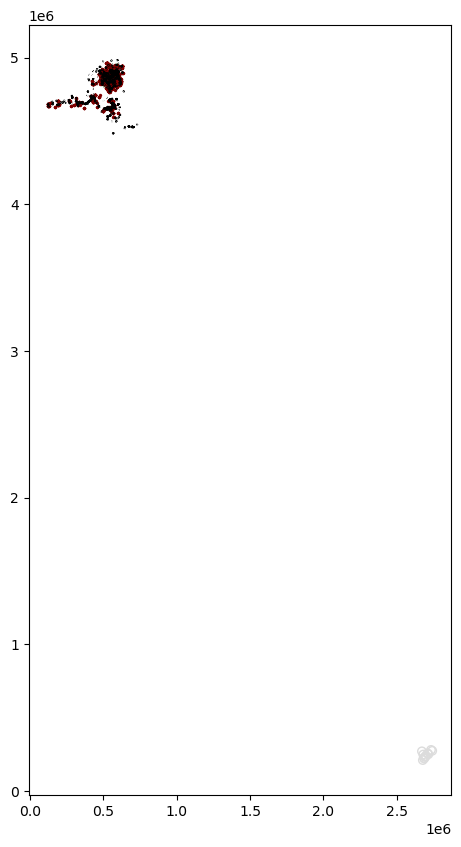

In [27]:
# Define a base map with county boundaries
ax = counties.plot(figsize=(10,10), color='none', edgecolor='gainsboro', zorder=3)

# Add wild lands, campsites, and foot trails to the base map
wild_lands.plot(color='lightgreen', ax=ax)
campsites.plot(color='maroon', markersize=2, ax=ax)
trails.plot(color='black', markersize=1, ax=ax)

주의 북동부 지역이 캠핑 여행을 위한 훌륭한 옵션이 될 것 같습니다!

## 네 차례 
이것은 처음에는 복잡하게 느껴지지만 중요한 분석을 수행할 수 있을 만큼 이미 충분히 배웠습니다. 비영리 단체가 사업을 확장할 수 있는 필리핀의 외딴 지역을 확인하면서 직접 확인하십시오.

In [30]:
# Read in the data
loans_file = gpd.read_file("C:/Users/joppu/OneDrive/문서/data minning/archive/kiva_loans/kiva_loans/kiva_loans.shp")

# View the first five rows of the data
loans_file.head()


,Partner ID,Field Part,sector,Loan Theme,country,amount,geometry
0,9,KREDIT Microfinance Institution,General Financial Inclusion,Higher Education,Cambodia,450,POINT (102.89751 13.66726)
1,9,KREDIT Microfinance Institution,General Financial Inclusion,Vulnerable Populations,Cambodia,20275,POINT (102.98962 13.02870)
2,9,KREDIT Microfinance Institution,General Financial Inclusion,Higher Education,Cambodia,9150,POINT (102.98962 13.02870)
3,9,KREDIT Microfinance Institution,General Financial Inclusion,Vulnerable Populations,Cambodia,604950,POINT (105.31312 12.09829)
4,9,KREDIT Microfinance Institution,General Financial Inclusion,Sanitation,Cambodia,275,POINT (105.31312 12.09829)


In [31]:
world_filepath = gpd.datasets.get_path('naturalearth_lowres')
world = gpd.read_file(world_filepath)
world.head()

C:\Users\joppu\AppData\Local\Temp\ipykernel_19956\4025383553.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_filepath = gpd.datasets.get_path('naturalearth_lowres')


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


<Axes: >

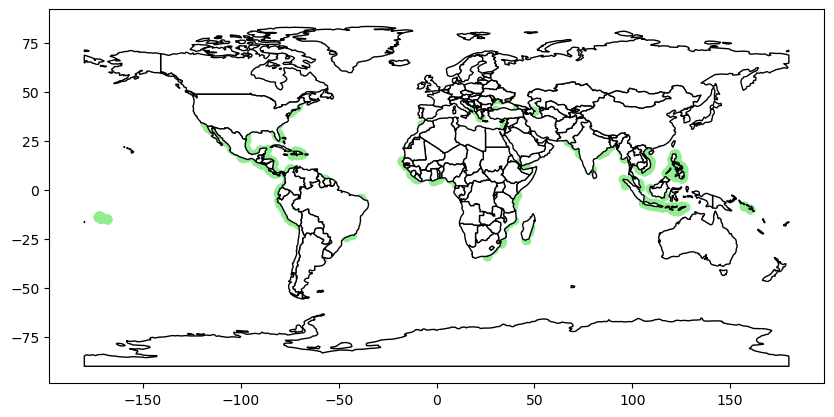

In [36]:
ax = world.plot(figsize=(10,10), color='white', edgecolor='black', zorder=3)
loans_file.plot(color='lightgreen', ax=ax)

In [37]:
PHL_loans =loans_file [loans_file['country'] == 'Philippines']
PHL_loans.head()

,Partner ID,Field Part,sector,Loan Theme,country,amount,geometry
2859,123,Alalay sa Kaunlaran (ASKI),General Financial Inclusion,General,Philippines,400,POINT (121.73961 17.64228)
2860,123,Alalay sa Kaunlaran (ASKI),General Financial Inclusion,General,Philippines,400,POINT (121.74169 17.63235)
2861,123,Alalay sa Kaunlaran (ASKI),General Financial Inclusion,General,Philippines,400,POINT (121.46667 16.60000)
2862,123,Alalay sa Kaunlaran (ASKI),General Financial Inclusion,General,Philippines,6050,POINT (121.73333 17.83333)
2863,123,Alalay sa Kaunlaran (ASKI),General Financial Inclusion,General,Philippines,625,POINT (121.51800 16.72368)


In [41]:
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'
PHL = gpd.read_file("C:/Users/joppu/OneDrive/문서/data minning/archive/Philippines_AL258.kml", driver = 'KML')
PHL.head()

,Name,Description,geometry
0,Autonomous Region in Muslim Mindanao,,"MULTIPOLYGON (((119.46690 4.58718, 119.46653 4..."
1,Bicol Region,,"MULTIPOLYGON (((124.04577 11.57862, 124.04594 ..."
2,Cagayan Valley,,"MULTIPOLYGON (((122.51581 17.04436, 122.51568 ..."
3,Calabarzon,,"MULTIPOLYGON (((120.49202 14.05403, 120.49201 ..."
4,Caraga,,"MULTIPOLYGON (((126.45401 8.24400, 126.45407 8..."


<Axes: >

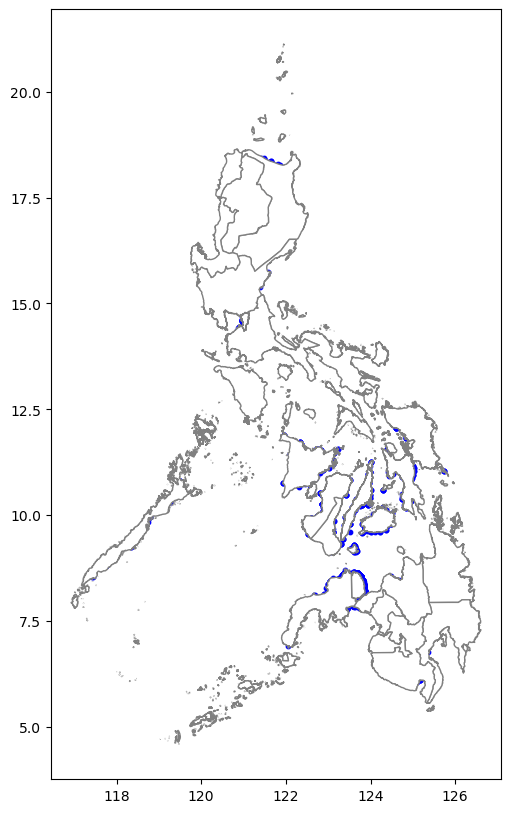

In [50]:
ax = PHL.plot(figsize = (10, 10), color = 'white', edgecolor = 'gray', zorder = 3)
PHL_loans.plot(color='blue',markersize = 10, ax = ax)